In [12]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

In [13]:
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")
test_ids = pd.read_csv("test.csv")["ID"]
train_data = train_data.drop(columns=["ID", "Customer_ID", "Month", "Name", "Number"])

print(train_data.head())

<ipython-input-13-b0c0d8359731>:1: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  train_data = pd.read_csv("train.csv")


  Age  Profession Income_Annual  Base_Salary_PerMonth  Total_Bank_Accounts  \
0  51    Musician     101583.48                   NaN                    5   
1  23      Writer     101926.95             8635.9125                    4   
2  49      Writer     158871.12                   NaN                    0   
3  40      Doctor      60379.28                   NaN                    5   
4  17  Accountant      50050.83             4085.9025                    9   

   Total_Credit_Cards  Rate_Of_Interest Total_Current_Loans  \
0                   7                10                  4_   
1                   4                 9                   1   
2                   4                 8                   1   
3                   6                18                   3   
4                  10                20                   5   

                                           Loan_Type  Delay_from_due_date  \
0  Payday Loan, Student Loan, Payday Loan, and De...                    8  

In [14]:
train_data.fillna(train_data.median(numeric_only=True), inplace=True)
print(train_data.head())

  Age  Profession Income_Annual  Base_Salary_PerMonth  Total_Bank_Accounts  \
0  51    Musician     101583.48           3086.683333                    5   
1  23      Writer     101926.95           8635.912500                    4   
2  49      Writer     158871.12           3086.683333                    0   
3  40      Doctor      60379.28           3086.683333                    5   
4  17  Accountant      50050.83           4085.902500                    9   

   Total_Credit_Cards  Rate_Of_Interest Total_Current_Loans  \
0                   7                10                  4_   
1                   4                 9                   1   
2                   4                 8                   1   
3                   6                18                   3   
4                  10                20                   5   

                                           Loan_Type  Delay_from_due_date  \
0  Payday Loan, Student Loan, Payday Loan, and De...                    8  

In [15]:
for col in ["Total_Current_Loans", "Current_Debt_Outstanding", "Income_Annual", "Credit_Limit", "Age", "Total_Credit_Cards", "Total_Bank_Accounts", "Delay_from_due_date"]:
    train_data[col] = pd.to_numeric(
        train_data[col].astype(str).str.replace("_", "", regex=False), errors="coerce"
    )
    test_data[col] = pd.to_numeric(
        test_data[col].astype(str).str.replace("_", "", regex=False), errors="coerce"
    )
train_data

,Age,Profession,Income_Annual,Base_Salary_PerMonth,Total_Bank_Accounts,Total_Credit_Cards,Rate_Of_Interest,Total_Current_Loans,Loan_Type,Delay_from_due_date,...,Credit_Mix,Current_Debt_Outstanding,Ratio_Credit_Utilization,Credit_History_Age,Payment_of_Min_Amount,Per_Month_EMI,Monthly_Investment,Payment_Behaviour,Monthly_Balance,Credit_Score
0,51,Musician,101583.480,3086.683333,5,7,10,4,"Payday Loan, Student Loan, Payday Loan, and De...",8,...,Standard,50.93,34.462154,24 Years and 1 Months,No,190.811017,630.0157894388726,Low_spent_Large_value_payments,314.0021934422197,Standard
1,23,Writer,101926.950,8635.912500,4,4,9,1,Mortgage Loan,13,...,_,1058.00,39.693812,20 Years and 5 Months,No,70.587681,662.8039273360225,Low_spent_Medium_value_payments,410.1996419555151,Standard
2,49,Writer,158871.120,3086.683333,0,4,8,1,Home Equity Loan,8,...,Good,576.48,39.367225,19 Years and 0 Months,No,86.905860,746.8059854204569,Low_spent_Medium_value_payments,742.5141542054829,Standard
3,40,Doctor,60379.280,3086.683333,5,6,18,3,"Personal Loan, Mortgage Loan, and Credit-Build...",15,...,Standard,725.39,29.061701,17 Years and 1 Months,NM,90.906385,166.41865803064803,High_spent_Medium_value_payments,473.13562343490486,Standard
4,17,Accountant,50050.830,4085.902500,9,10,20,5,"Student Loan, Credit-Builder Loan, Debt Consol...",28,...,Bad,3419.10,30.386321,4 Years and 6 Months,Yes,190.445060,56.789441169542684,High_spent_Large_value_payments,401.3557486786916,Poor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79995,55,Doctor,114597.040,3086.683333,7,6,4,4,"Auto Loan, Not Specified, Payday Loan, and Stu...",32,...,Good,926.18,26.436313,31 Years and 9 Months,No,225.923762,327.61966834569836,High_spent_Medium_value_payments,633.131903,Poor
79996,28,Entrepreneur,8227.855,656.654583,6,8,31,-100,"Not Specified, Credit-Builder Loan, Credit-Bui...",61,...,_,2695.38,24.127401,11 Years and 8 Months,NM,7352.000000,49.54415830254037,Low_spent_Medium_value_payments,268.108435,Poor
79997,46,Writer,35032.660,2853.388333,10,6,33,7,"Credit-Builder Loan, Student Loan, Personal Lo...",48,...,Bad,1789.00,25.086176,11 Years and 5 Months,Yes,150.500097,106.73567925309915,Low_spent_Small_value_payments,318.103057,Poor
79998,42,Mechanic,129680.280,10643.690000,8,3,5,2,"Mortgage Loan, and Credit-Builder Loan",27,...,_,240.27,33.944094,20 Years and 5 Months,NM,114.165609,567.1798727916067,High_spent_Small_value_payments,643.023518,Standard


In [16]:
train_data["Credit_History_Age"] = train_data["Credit_History_Age"].str.extract("(\d+)").astype(float)
test_data["Credit_History_Age"] = test_data["Credit_History_Age"].str.extract("(\d+)").astype(float)
train_data["Credit_History_Age"]

,Credit_History_Age
0,24.0
1,20.0
2,19.0
3,17.0
4,4.0
...,...
79995,31.0
79996,11.0
79997,11.0
79998,20.0


In [17]:
train_data.replace([np.inf, -np.inf], np.nan, inplace=True)
train_data.fillna(train_data.median(numeric_only=True), inplace=True)
label_encoder = LabelEncoder()
train_data["Credit_Score"] = label_encoder.fit_transform(train_data["Credit_Score"])

In [18]:
train_data.head()

,Age,Profession,Income_Annual,Base_Salary_PerMonth,Total_Bank_Accounts,Total_Credit_Cards,Rate_Of_Interest,Total_Current_Loans,Loan_Type,Delay_from_due_date,...,Credit_Mix,Current_Debt_Outstanding,Ratio_Credit_Utilization,Credit_History_Age,Payment_of_Min_Amount,Per_Month_EMI,Monthly_Investment,Payment_Behaviour,Monthly_Balance,Credit_Score
0,51,Musician,101583.48,3086.683333,5,7,10,4,"Payday Loan, Student Loan, Payday Loan, and De...",8,...,Standard,50.93,34.462154,24.0,No,190.811017,630.0157894388726,Low_spent_Large_value_payments,314.0021934422197,2
1,23,Writer,101926.95,8635.912500,4,4,9,1,Mortgage Loan,13,...,_,1058.00,39.693812,20.0,No,70.587681,662.8039273360225,Low_spent_Medium_value_payments,410.1996419555151,2
2,49,Writer,158871.12,3086.683333,0,4,8,1,Home Equity Loan,8,...,Good,576.48,39.367225,19.0,No,86.905860,746.8059854204569,Low_spent_Medium_value_payments,742.5141542054829,2
3,40,Doctor,60379.28,3086.683333,5,6,18,3,"Personal Loan, Mortgage Loan, and Credit-Build...",15,...,Standard,725.39,29.061701,17.0,NM,90.906385,166.41865803064803,High_spent_Medium_value_payments,473.13562343490486,2
4,17,Accountant,50050.83,4085.902500,9,10,20,5,"Student Loan, Credit-Builder Loan, Debt Consol...",28,...,Bad,3419.10,30.386321,4.0,Yes,190.445060,56.789441169542684,High_spent_Large_value_payments,401.3557486786916,1


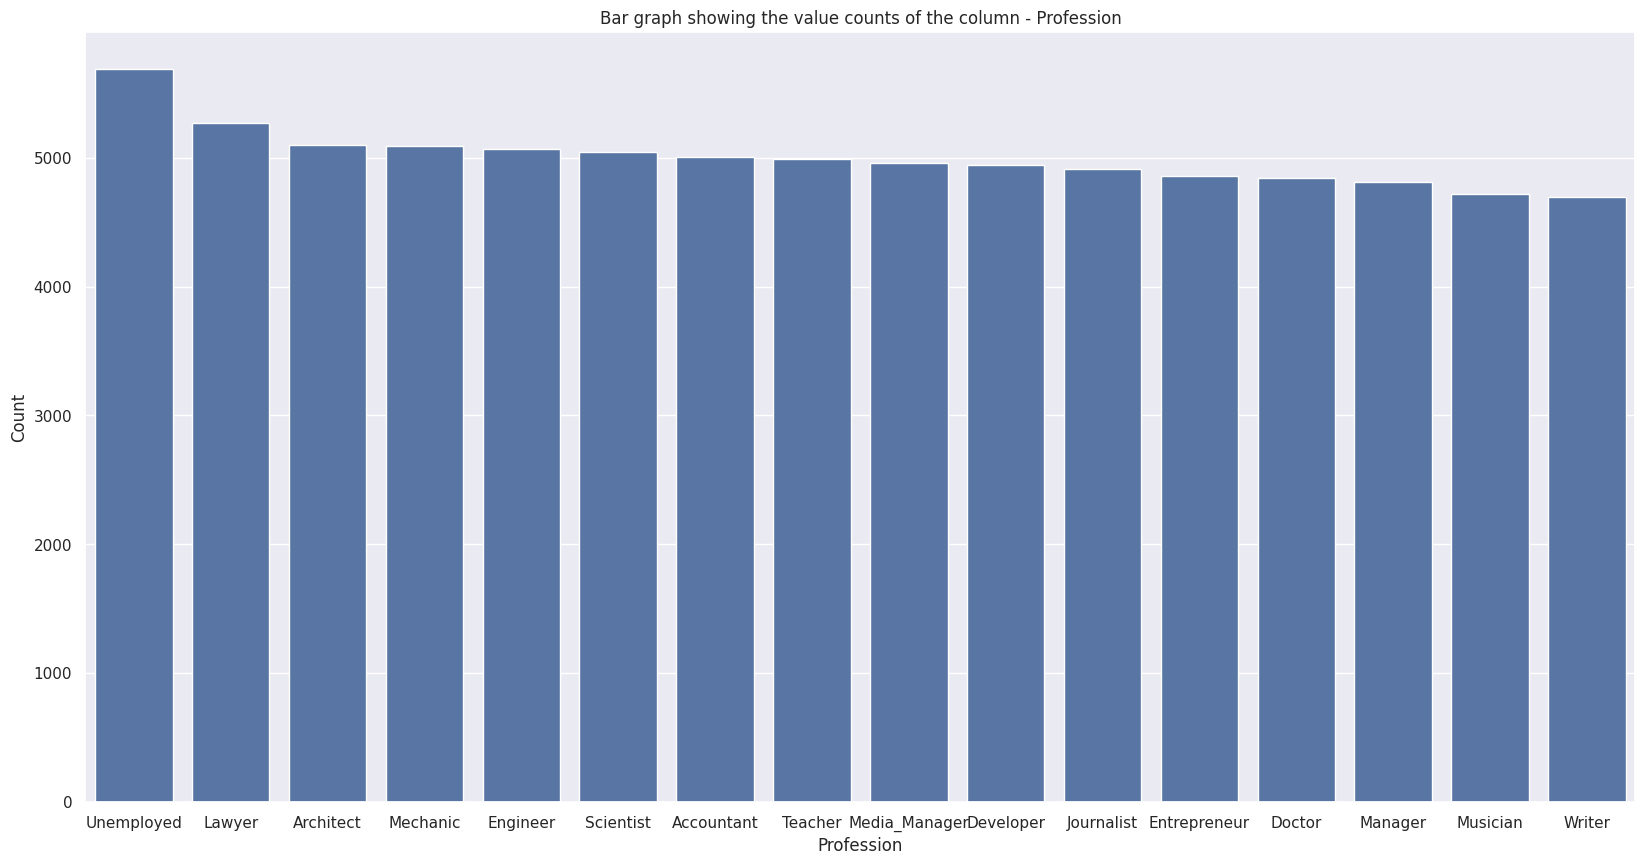

In [19]:
train_data.loc[train_data['Profession'].str.startswith('_', na=False), 'Profession'] = 'Unemployed'
profession_count = train_data['Profession'].value_counts(dropna=False)
sns.set(rc={'figure.figsize': (20, 10)})
sns.barplot(x=profession_count.index, y=profession_count.values)
plt.title('Bar graph showing the value counts of the column - Profession')
plt.ylabel('Count', fontsize=12)
plt.xlabel('Profession', fontsize=12)
plt.show()

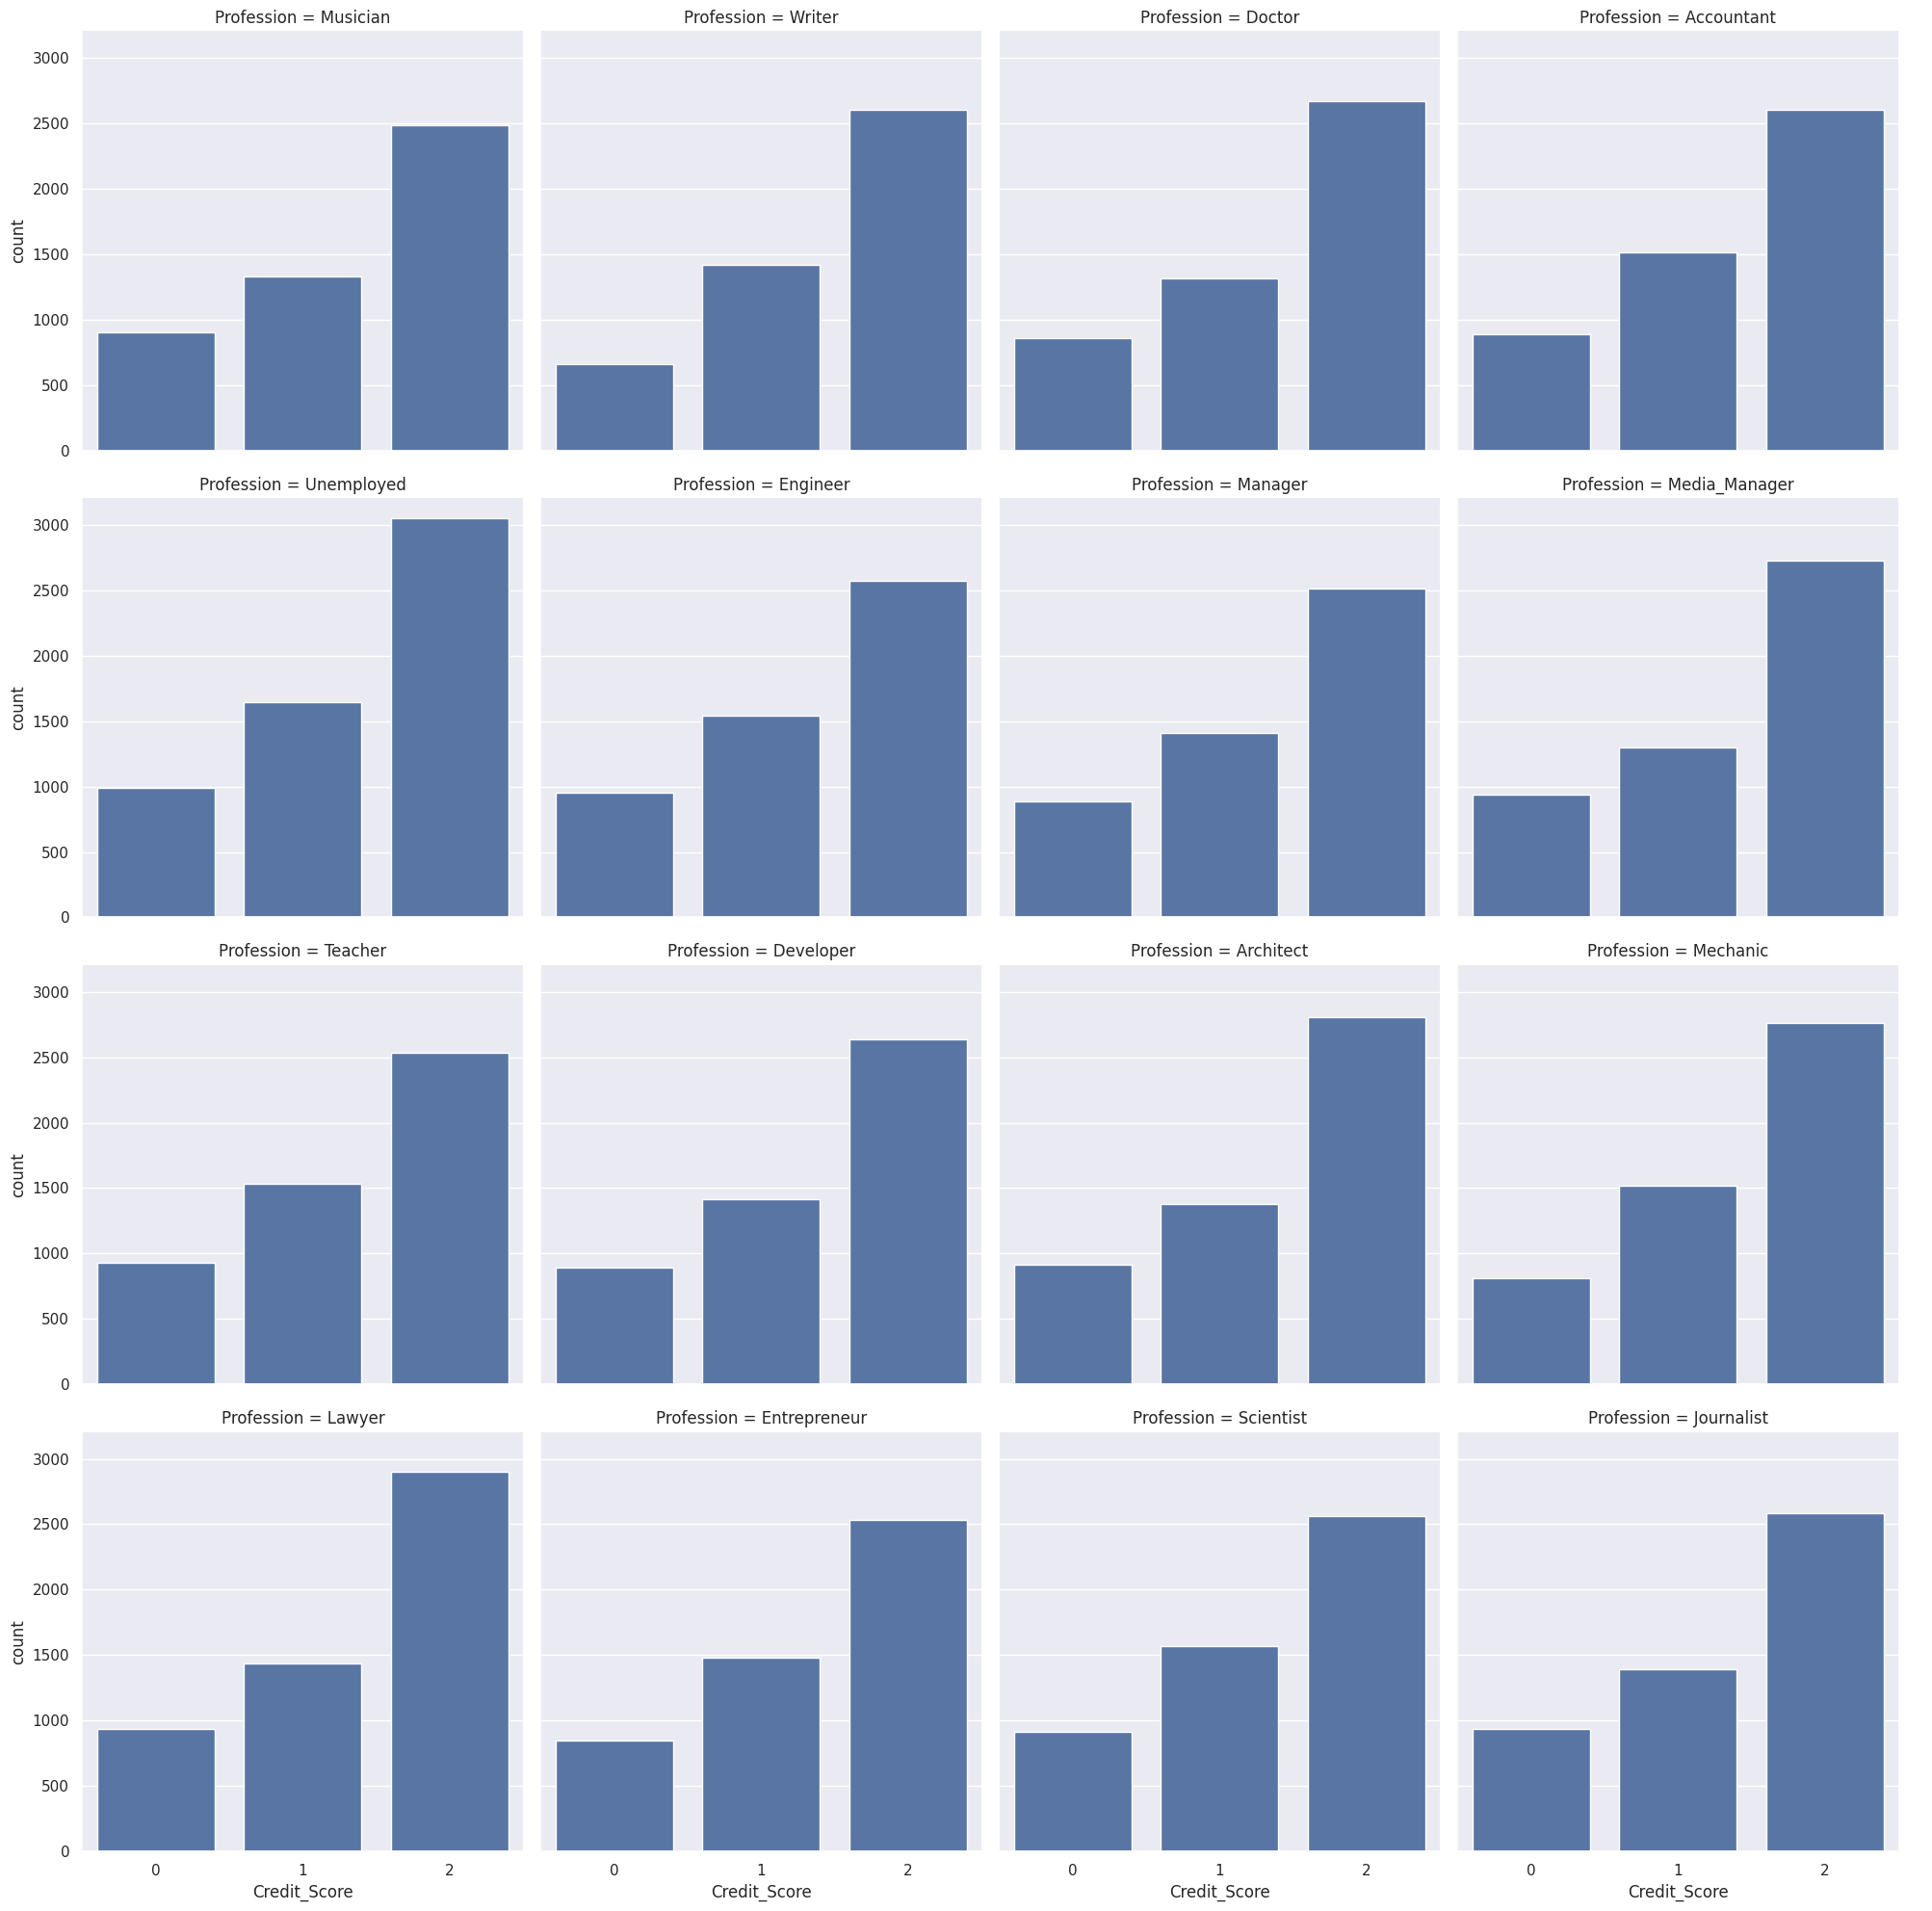

In [20]:
sns.catplot(x='Credit_Score', col='Profession', data=train_data, kind='count', col_wrap=4)

In [23]:
index_values = ~train_data['Loan_Type'].isnull().values
loan_type_data = list(train_data['Loan_Type'][index_values])
loan_type_dict = dict()
for value in loan_type_data:
    values = value.split(',')
    for each_value in values:
        loan_type = each_value.strip(' ')
        if 'and' in loan_type:
            loan_type = loan_type[4 : ]
        if loan_type in loan_type_dict:
            loan_type_dict[loan_type] += 1
        else:
            loan_type_dict[loan_type] = 1

loan_type_dict

{'Payday Loan': 32361,
 'Student Loan': 31207,
 'Debt Consolidation Loan': 31038,
 'Mortgage Loan': 31116,
 'Home Equity Loan': 31333,
 'Personal Loan': 31100,
 'Credit-Builder Loan': 32264,
 'Not Specified': 31676,
 'Auto Loan': 30334}

Text(0.5, 0, 'Loan_Type')

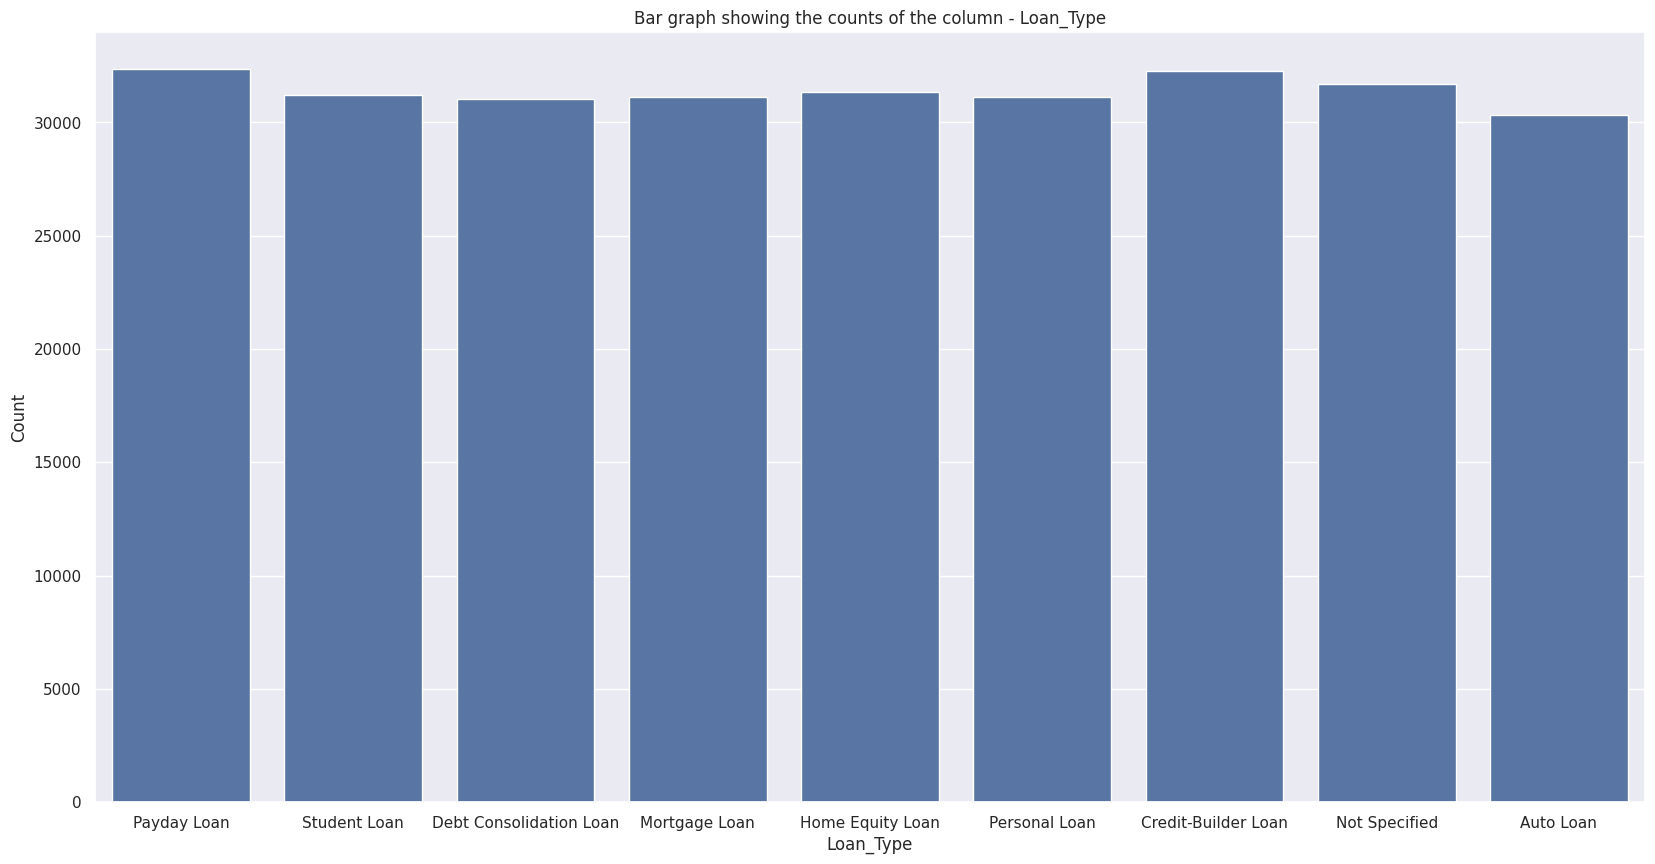

In [26]:
sns.set(rc = {'figure.figsize': (20, 10)})
sns.barplot(x=list(loan_type_dict.keys()), y=list(loan_type_dict.values()))
plt.title('Bar graph showing the counts of the column - Loan_Type')
plt.ylabel('Count', fontsize = 12)
plt.xlabel('Loan_Type', fontsize = 12)

In [27]:
credit_mix_count = train_data['Credit_Mix'].value_counts(dropna = False)
credit_mix_count

,count
Credit_Mix,
Standard,29214
Good,19455
_,16108
Bad,15223


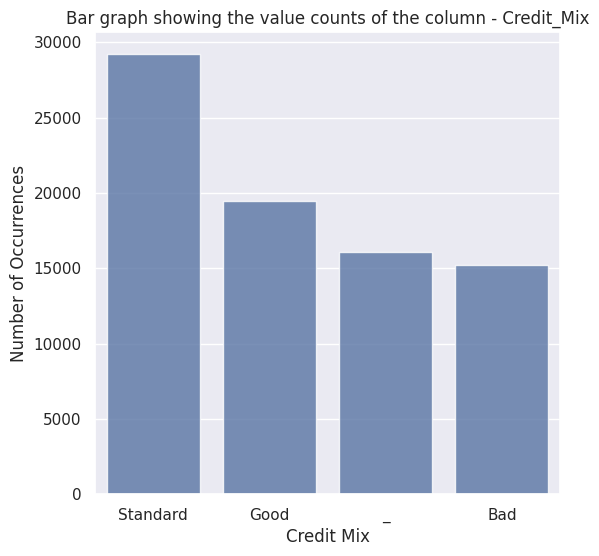

In [28]:
sns.set(rc = {'figure.figsize': (6, 6)})
sns.barplot(x=credit_mix_count.index,y= credit_mix_count.values, alpha = 0.8)
plt.title('Bar graph showing the value counts of the column - Credit_Mix')
plt.ylabel('Number of Occurrences', fontsize = 12)
plt.xlabel('Credit Mix', fontsize = 12)
plt.show()

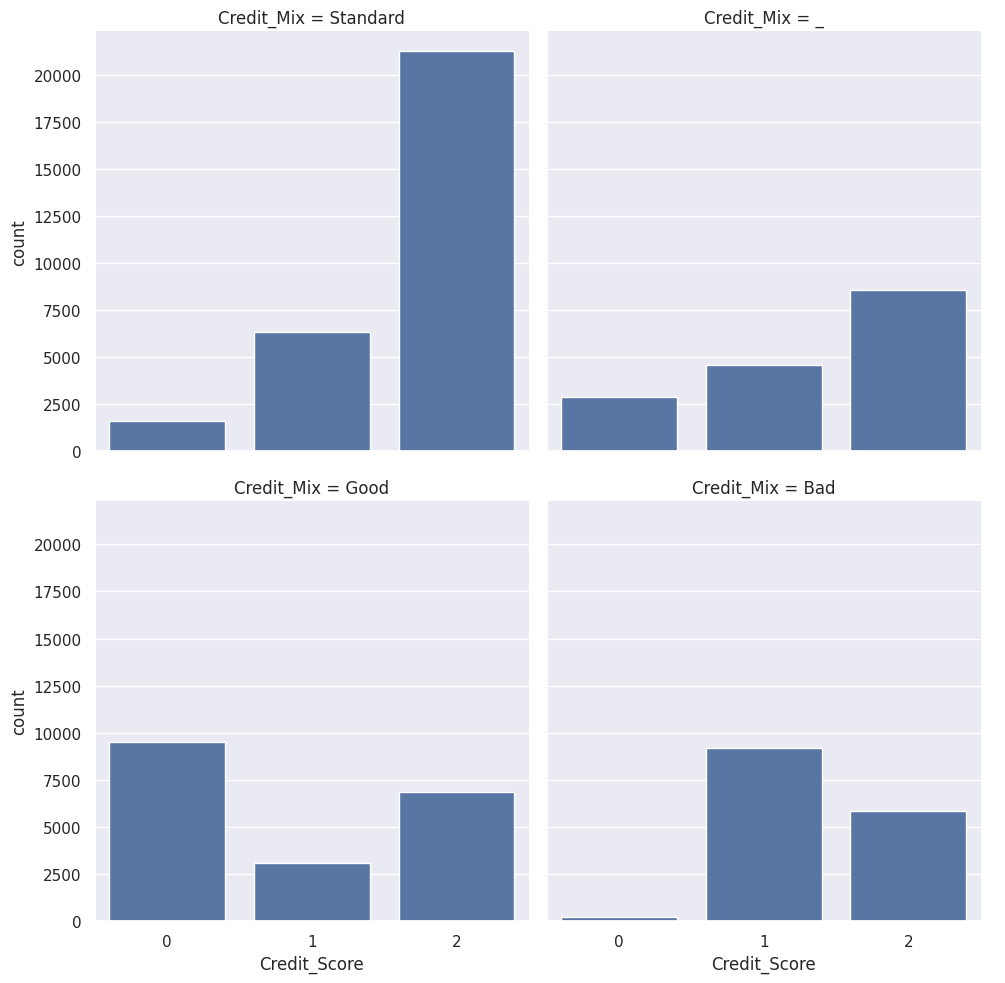

In [32]:
sns.catplot(x='Credit_Score', col = 'Credit_Mix', data = train_data, kind = 'count', col_wrap = 2)